# Assignment 5 : Perform Deep Learning Techniques
# 1. Dense Layer

**Description:** A Dense Layer, or fully connected layer, connects every neuron in one layer to every neuron in the next layer.

**Key Points:**

**Weights and Biases:** Each connection has an associated weight, and each neuron has a bias.


**Libraries for Deep Learning:**

**TensorFlow and Keras:**
Two popular libraries for building deep learning models.

**Installation:**

Installing several popular Python libraries commonly used in machine learning and computer vision tasks:
**TensorFlow:** A framework for deep learning and machine learning.

**Keras:** A high-level neural networks API, often used with TensorFlow.

**OpenCV:** A library for computer vision tasks.

**Matplotlib:** A plotting library for creating static, animated, and interactive visualizations.

**Scikit-learn:** A machine learning library for Python that provides tools for data analysis and modeling.

`!pip install tensorflow keras opencv-python matplotlib scikit-learn`



In [2]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn

**Importing necessary libraries for building a neural network model.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Loading the Fashion-MNIST dataset into training and testing sets:**

**Content:**The dataset consists of 60,000 training and 10,000 test images, each of size 28x28 pixels in grayscale.

**Categories:** It contains 10 different classes of fashion items, including: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

In [ ]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


**Displaying 10 images from the training set in a 2x5 grid with their corresponding class labels as titles.**

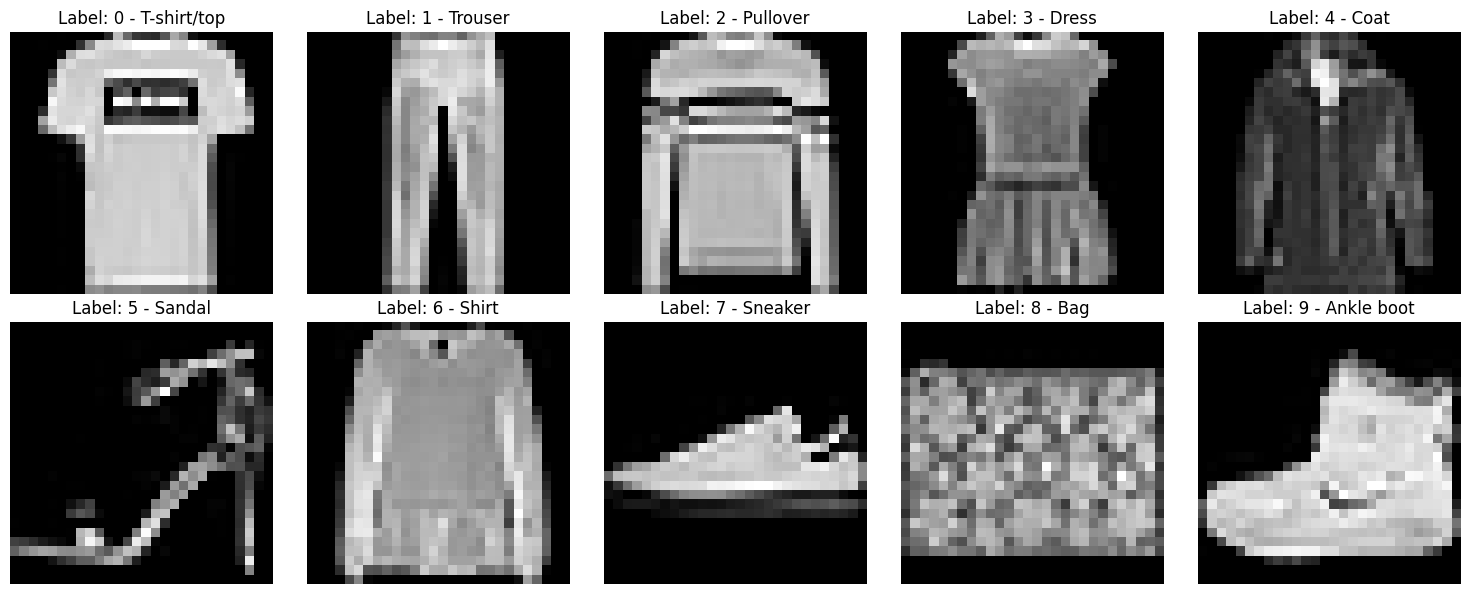

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):

    idx = (y_train == i).argmax()
    ax = axes[i // 5, i % 5]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"Label: {i} - {class_names[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Normalizing images, flattening them into 1D arrays, and one-hot encoding the labels for training and testing.**

In [ ]:
# Normalize the images (scale pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 1D arrays of 784 pixels
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Building a simple feed-forward neural network with a hidden layer of 128 units and an output layer for 10 classes.**

In [ ]:
# Build a simple feed-forward neural network (Dense layers)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the model with the `adam` optimizer, `categorical_crossentropy` loss, and `accuracy` as the evaluation metric.**



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training the model for 10 epochs with a batch size of 32, using the test set for validation.**

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7786 - loss: 0.6324 - val_accuracy: 0.8472 - val_loss: 0.4345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8602 - loss: 0.3844 - val_accuracy: 0.8629 - val_loss: 0.3827
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8759 - loss: 0.3420 - val_accuracy: 0.8683 - val_loss: 0.3716
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8847 - loss: 0.3084 - val_accuracy: 0.8690 - val_loss: 0.3575
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8939 - loss: 0.2918 - val_accuracy: 0.8683 - val_loss: 0.3697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8953 - loss: 0.2834 - val_accuracy: 0.8788 - val_loss: 0.3414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9029 - loss: 0.2652 - val_accuracy: 0.8818 - val_loss: 0.3420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9054 - loss: 0

**Visualizing the training and validation accuracy over epochs for the model.**

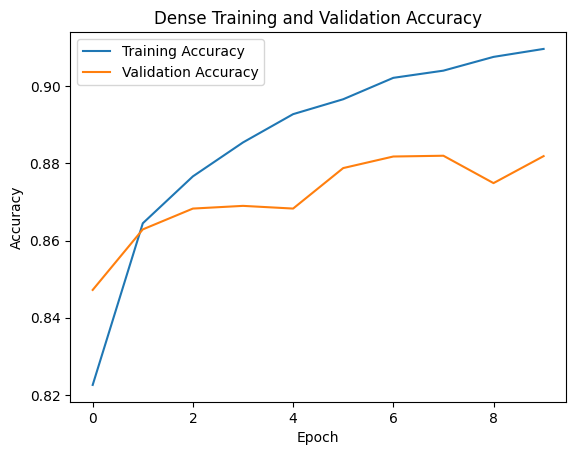

In [ ]:
# Visualize training accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dense Training and Validation Accuracy')
plt.legend()
plt.show()

**Visualizing the training and validation loss over epochs for the model.**

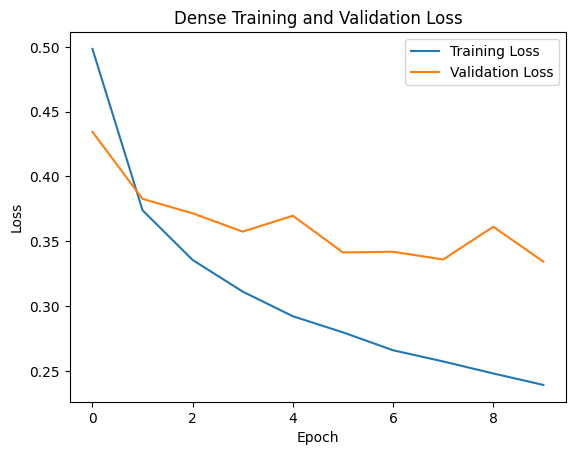

In [ ]:
# Visualize training loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dense Training and Validation Loss')
plt.legend()
plt.show()

**Evaluating the model on the test set and printing the test accuracy.**

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 0s - 2ms/step - accuracy: 0.8819 - loss: 0.3343

Test accuracy: 0.8819


**Visualizing the first 5 test images with their predicted class labels.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


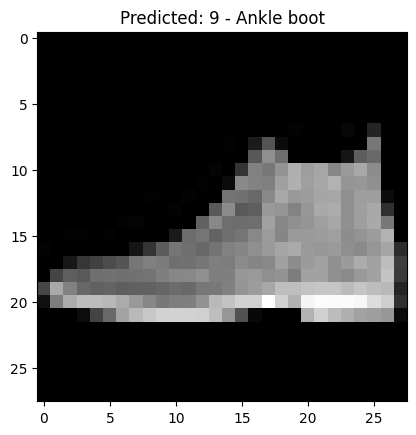

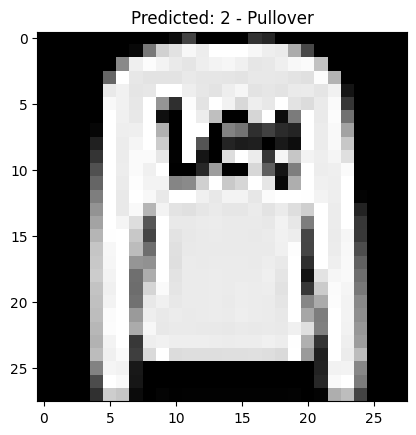

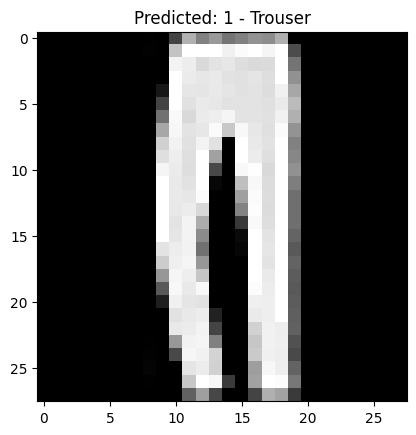

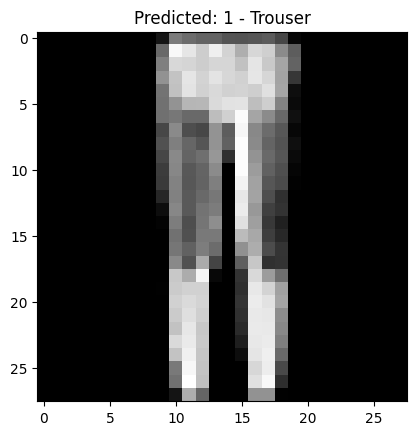

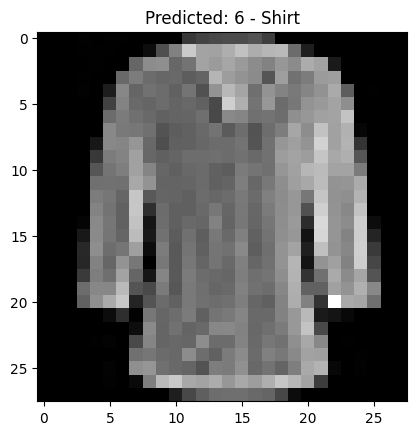

In [ ]:
# Visualize some predictions
predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = predictions[i].argmax()  # Get the predicted class index
    predicted_class_name = class_names[predicted_label]  # Get the predicted class name
    plt.title(f'Predicted: {predicted_label} - {predicted_class_name}')
    plt.show()

# 2. CNN Layer
**Description:** Convolutional Neural Networks (CNN) CNNs are specifically designed for image data. They consist of convolutional layers, pooling layers, and fully connected layers.

**Key Points:**

**Convolutional Layer:** Applies convolutional filters to the input, capturing spatial hierarchies in images.

**Pooling Layer:** Reduces the spatial dimensions (width and height) of the input volume, preserving the most important features.

In [3]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

**Loading the Stanford Dogs dataset with additional information using TensorFlow Datasets.**

The Stanford Dogs dataset is a collection of images that contains over 20,000 images of 120 different dog breeds

In [5]:
# Load the Stanford Dogs dataset
dataset, info = tfds.load('stanford_dogs', with_info=True, as_supervised=True)

In [6]:
# Display dataset info
print(info)

tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around the
    world. This dataset has been built using images and annotation from ImageNet for
    the task of fine-grained image categorization. There are 20,580 images, out of
    which 12,000 are used for training and 8580 for testing. Class labels and
    bounding box annotations are provided for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_dir='/root/tensorflow_datasets/stanford_dogs/0.2.0',
    file_format=tfrecord,
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=120),
        'objects': Sequence({
            'bbox': B

**Splitting the dataset into training and testing subsets for model training and evaluation.**

In [7]:
# Split the dataset into training and testing
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
# Take a few samples from the train dataset
sample_images = []
sample_labels = []

# Iterate over the dataset
for image, label in train_dataset.take(9):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# Display the images in a 3x3 grid
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    label_str = info.features['label'].int2str(sample_labels[i])
    plt.title(f"Label: {label_str}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Preprocessing the dataset by resizing images to 224x224 pixels and normalizing pixel values to the range [0, 1].**

In [ ]:
# Preprocessing and batching
train_dataset = train_dataset.map(lambda image, label: (tf.image.resize(image, (224, 224)) / 255.0, label))
test_dataset = test_dataset.map(lambda image, label: (tf.image.resize(image, (224, 224)) / 255.0, label))

**Shuffling the training dataset and batching both the training and testing datasets with a batch size of 32.**

In [ ]:
# Batch and shuffle the datasets
train_dataset = train_dataset.shuffle(1000).batch(32)
test_dataset = test_dataset.batch(32)

**Creating a CNN model with three convolutional layers, max pooling, and a fully connected output layer for classifying 120 dog breeds.**

In [ ]:
# Create a CNN model
cnn_model = models.Sequential([
    # First convolutional layer (32 filters, 3x3 kernel, ReLU activation)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer to downsample

    # Second convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer to downsample

    # Third convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output before feeding it to the dense layers
    layers.Flatten(),

    # Fully connected dense layer (64 neurons)
    layers.Dense(64, activation='relu'),

    # Output layer (120 classes for 120 breeds, softmax activation)
    layers.Dense(120, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Displaying the architecture of the model, including the layers, their output shapes, the number of parameters for each layer, and the total number of parameters in the model.**

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │           7,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,139,768 (42.49 MB)

 Trainable params: 11,139,768 (42.49 MB)

 Non-trainable params: 0 (0.00 B)

**Compiling the CNN model with the `adam` optimizer, `sparse_categorical_crossentropy` loss, and `accuracy` as the evaluation metric.**

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the CNN model for 10 epochs using the training dataset, with the test dataset used for validation.**

In [ ]:
# Train the model
cnn_history = cnn_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.0055 - loss: 4.8403 - val_accuracy: 0.0162 - val_loss: 4.7872
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 103ms/step - accuracy: 0.0093 - loss: 4.7881 - val_accuracy: 0.0083 - val_loss: 4.7876
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.0085 - loss: 4.7867 - val_accuracy: 0.0138 - val_loss: 4.7392
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.0300 - loss: 4.6241 - val_accuracy: 0.0211 - val_loss: 4.8099
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.1690 - loss: 3.7707 - val_accuracy: 0.0202 - val_loss: 6.3868
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 122ms/step - accuracy: 0.5563 - loss: 1.8933 - val_accuracy: 0.0199 - val_loss: 11.7873
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 97ms/step - accuracy: 0.8030 - loss: 0.8948 - val_accuracy: 0.0214 - val_loss: 18.9418
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.8918 - loss: 0.50

**Evaluating the CNN model on the test dataset and printing the test accuracy as a percentage.**

In [ ]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.0242 - loss: 24.9631
Test Accuracy: 2.38%


**Visualizing the training and validation accuracy over epochs for the CNN model.**

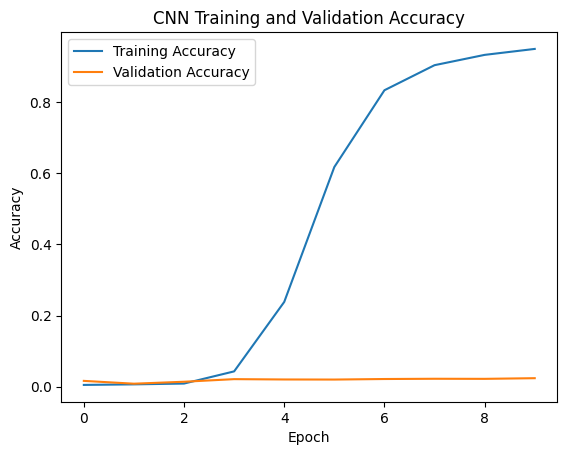

In [ ]:
# Visualize training accuracy history
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.show()

**Visualizing the training and validation loss over epochs for the CNN model.**

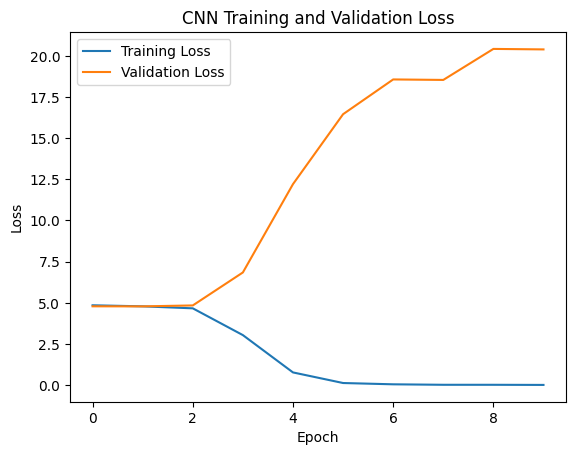

In [ ]:
# Visualize training loss history
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()
plt.show()

**Predicting the class of a test image from the test dataset using the trained CNN model.**

In [ ]:
# Predict on a test image
image, label = next(iter(test_dataset))  # Take a batch of images from the test dataset
predictions = cnn_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


**Displaying the image from the test batch and showing the predicted label for the image using the trained CNN model.**

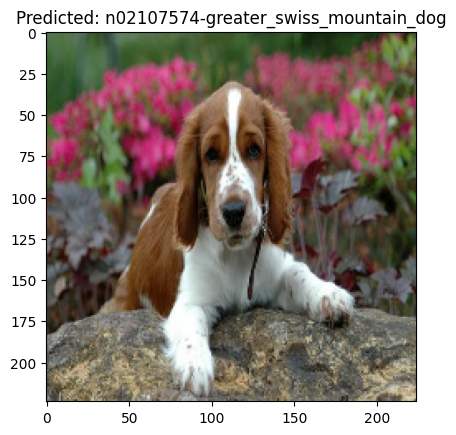

In [ ]:
# Show the image and predicted label
plt.imshow(image[0])
plt.title(f"Predicted: {info.features['label'].int2str(tf.argmax(predictions[0]))}")
plt.axis('off')
plt.show()

# 3. RNN Layer
**Description:** Recurrent Neural Networks (RNNs) are specialized neural networks designed for processing sequential data. Unlike standard feedforward networks, RNNs have connections that form cycles within the network, which allows them to maintain a "memory" of previous inputs in the sequence.

**Key Concepts:**

**Hidden State:** The hidden state carries information about the sequence from previous time steps.

**Vanishing Gradient Problem:** Standard RNNs often suffer from vanishing gradients during backpropagation through time, limiting their ability to learn long-term dependencies.

In [ ]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Prepare the dataset
X = np.array([[1, 2, 3, 4, 5],
              [2, 3, 4, 5, 6],
              [1, 2, 1, 2, 1],
              [5, 4, 3, 2, 1]])

# Define Y (target values) as the next number in each sequence
y = np.array([6, 7, 2, 0], dtype=np.float32)

In [ ]:
# Reshape X to be in the format [samples, time steps, features]
X_train = X[:, :4].reshape((X.shape[0], 4, 1))
y_train = y.reshape((y.shape[0], 1))

**We use the first 4 numbers to predict the 5th number in each sequence**

In [ ]:
# Check the shape of the data
X_train.shape, y_train.shape

((4, 4, 1), (4, 1))

In [ ]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))  # 50 RNN units
rnn_model.add(Dense(1))  # Single output for prediction

In [ ]:
# Summary of the model
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 30.8743
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 29.3949
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 28.0094
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 26.6961
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 25.4048
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 24.1149
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 22.8849
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 21.7339
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 20.6286
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 19.5802
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 18.5883
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 17.6529
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.7872
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.9863
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.2291
Epoc

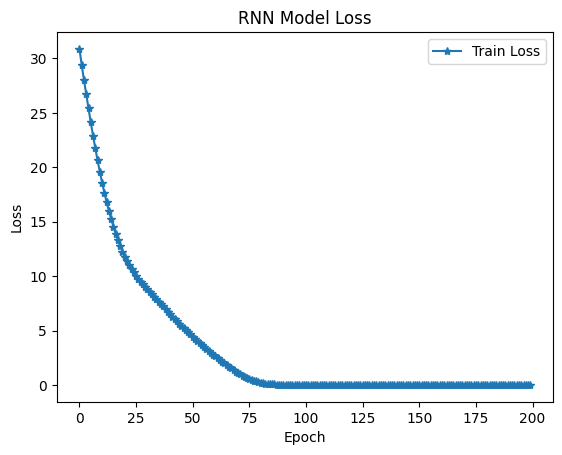

In [ ]:
# Plot training loss values
plt.plot(rnn_history.history['loss'], label='Train Loss', marker='*')
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test the model
x_test = np.array([[1, 2, 3, 4]], dtype=np.float32).reshape((1, 4, 1))  # Test with input [1, 2, 3, 4]
predicted_value = rnn_model.predict(x_test)
print(f'Predicted value for input [1, 2, 3, 4]: {predicted_value[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted value for input [1, 2, 3, 4]: 6.00


In [ ]:
x_test2 = np.array([[5, 4, 3, 2]], dtype=np.float32).reshape((1, 4, 1))  # Test with input [5, 4, 3, 2]
predicted_value2 = rnn_model.predict(x_test2)
print(f'Predicted value for input [5, 4, 3, 2]: {predicted_value2[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted value for input [5, 4, 3, 2]: -0.00
